In [1]:
import pandas as pd

parsed_songs = pd.read_csv('../data/songs.csv', sep='\t', index_col=0)
parsed_songs.shape

(29590, 6)

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

parsed_songs.hist('year', bins=100)
plt.show()

<Figure size 640x480 with 1 Axes>

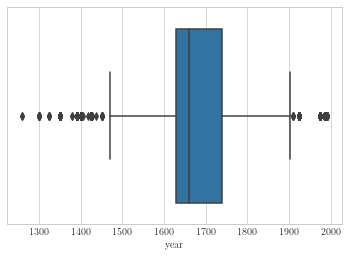

In [4]:
sns.boxplot(x=parsed_songs['year'])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('boxplot.pdf')

In [4]:
parsed_songs = parsed_songs[(parsed_songs['year'] >= 1550)
& (parsed_songs['year'] <= 1750)]
parsed_songs.shape

(22297, 6)

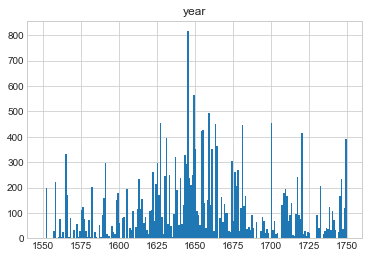

In [5]:
parsed_songs.hist('year', bins=200)
plt.show()

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


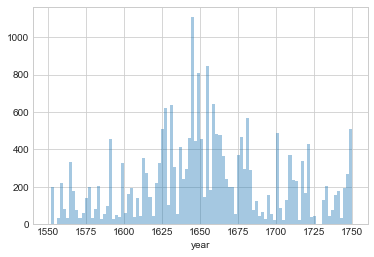

In [7]:
sns.distplot(parsed_songs['year'], kde=False, bins=100)
plt.savefig('histyear.png', dpi=300)

In [19]:
categories = parsed_songs.groupby('category')['id'].count().sort_values(ascending=False)

In [20]:
print(categories.to_latex())

\begin{tabular}{lr}
\toprule
{} &    id \\
category                  &       \\
\midrule
None                      &  7017 \\
religion                  &  6914 \\
love and sex              &  3261 \\
seasons and annual events &  1033 \\
formal genres             &   818 \\
amusement                 &   722 \\
emotions                  &   694 \\
narratives                &   479 \\
cycle of life             &   473 \\
politics and history      &   300 \\
groups                    &   187 \\
children                  &   148 \\
occasions                 &   100 \\
theatre                   &    90 \\
work                      &    59 \\
miscellaneous             &     2 \\
\bottomrule
\end{tabular}



In [21]:
parsed_songs.columns

Index(['category', 'id', 'lat', 'location', 'lon', 'year'], dtype='object')

In [30]:
parsed_songs.groupby('location')['id'].count().sort_values(ascending=False)


location
Amsterdam, The Netherlands                  7077
Antwerp, Belgium                            2781
Haarlem, The Netherlands                    1851
None                                         915
Utrecht, The Netherlands                     899
Leiden, The Netherlands                      763
Dordrecht, The Netherlands                   670
Hoorn, The Netherlands                       668
Brussels, Belgium                            618
Leuven, Belgium                              554
The Hague, The Netherlands                   466
Alkmaar, The Netherlands                     442
Leeuwarden, The Netherlands                  402
Enkhuizen, The Netherlands                   363
Emden, Germany                               299
Delft, The Netherlands                       284
Rotterdam, The Netherlands                   259
Wesel, Germany                               237
Gent, Belgium                                236
Mechelen, Belgium                            203
Deventer, T

In [25]:
import sys
sys.path.append('scripts')

In [26]:
from utils import get_country
parsed_songs['country'] = parsed_songs['location'].apply(get_country)

In [28]:
countries = parsed_songs.groupby('country')['id'].count().sort_values(ascending=False)

In [29]:
print(countries.to_latex())

\begin{tabular}{lr}
\toprule
{} &     id \\
country         &        \\
\midrule
The Netherlands &  15614 \\
Belgium         &   4599 \\
Unknown         &   1068 \\
Germany         &    872 \\
England         &     76 \\
France          &     68 \\
\bottomrule
\end{tabular}

